In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1,parser='auto')
import matplotlib as mlt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [50]:
x,y=mnist['data'],mnist['target']
print(x.shape)
print(y.shape)
x=pd.DataFrame(x)


(70000, 784)
(70000,)


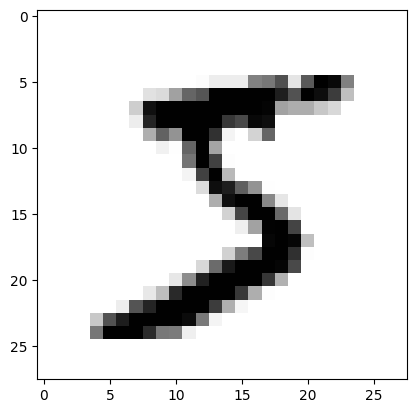

In [3]:
some_digit=x.iloc[0]
img=some_digit.values.reshape(28, 28)
plt.imshow(img,cmap=mlt.cm.binary)

In [52]:
y_w=y = y.astype(np.uint8)
y=(y==5)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
11742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.linear_model import SGDClassifier
clr=SGDClassifier()
clr.fit(x_train,y_train)


SGDClassifier()

In [7]:
from sklearn.metrics import mean_squared_error
y_pred=clr.predict(x_test)

In [8]:
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns

print(confusion_matrix(y_pred,y_test))
accuracy_score(y_test,y_pred)

[[12211   153]
 [  533  1103]]


0.951

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=3,test_size=0.2,random_state=42)
for train_index,test_index in split.split(x,y):
    strat_train_x=x.loc[train_index]
    strat_train_y=y.loc[train_index]
    strat_test_x=x.loc[test_index]
    strat_test_y=y.loc[test_index]

In [10]:
clr.fit(strat_train_x,strat_train_y)


SGDClassifier()

In [11]:
y_pred=clr.predict(strat_test_x)

In [12]:
accuracy_score(strat_test_y,y_pred)

0.9687857142857143

In [13]:
c=confusion_matrix(y_pred,strat_test_y)
c

array([[12656,   356],
       [   81,   907]], dtype=int64)

In [14]:
cof=clr.coef_
x=pd.DataFrame(cof)


In [15]:
from sklearn.model_selection import cross_val_predict
y_score=cross_val_predict(clr,x_train,y_train,cv=3,method="decision_function")
y_score

array([ -5867.08754694, -18518.67108061,  -2381.02720464, ...,
       -18128.51617812,  -8932.1387425 ,   2527.41768585])

In [16]:
from sklearn.metrics import precision_recall_curve
per,recall,threshold=precision_recall_curve(y_train,y_score)
print(len(per))
print(len(recall))
print(len(threshold))
threshold

56001
56001
56000


array([-123780.56423487, -120783.01444425, -117986.10104055, ...,
         28173.93249299,   28610.56638631,   32614.51676388])

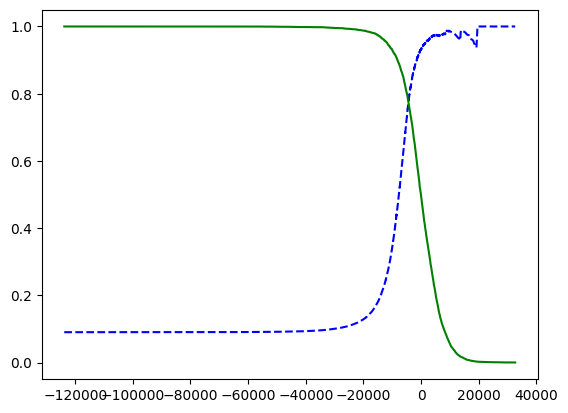

In [17]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
     #[...] # highlight the threshold, add the legend, axis label and grid
plot_precision_recall_vs_threshold(per, recall, threshold)
plt.show()


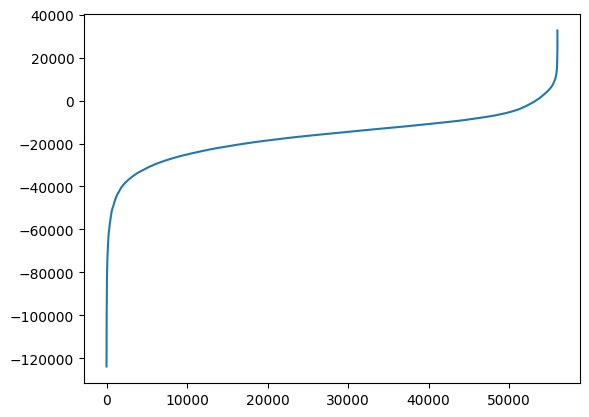

In [18]:
plt.plot(threshold)

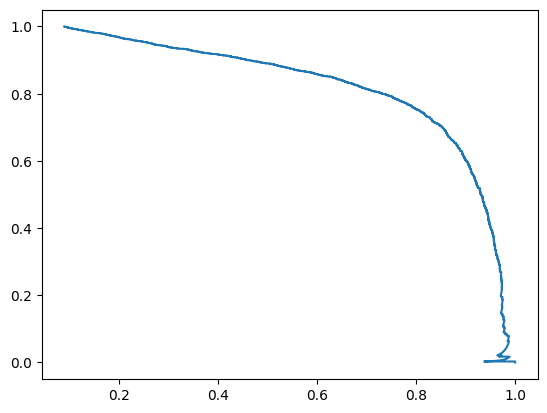

In [19]:
plt.plot(per,recall)

In [20]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_train,y_score)

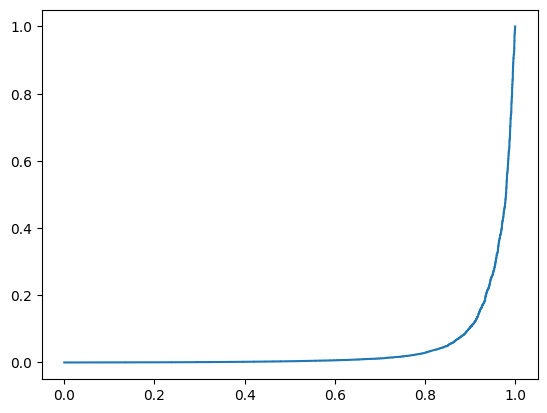

In [21]:
plt.plot(tpr,fpr)


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
x_train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
y_pred=cross_val_predict(clr,x_train_scaled,y_train,cv=3)


In [24]:
confusion_matrix(y_pred,y_train)

array([[50366,  1152],
       [  577,  3905]], dtype=int64)

<h1>multiclass

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_w,test_size=0.2)

In [54]:
from sklearn.multiclass import OneVsOneClassifier
clr=OneVsOneClassifier(SGDClassifier(random_state=42))
clr.fit(x_train,y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [60]:
y_pred=clr.predict(x_test)

In [62]:
cl_a, cl_b = 3, 5
x_aa = x_test[(y_test == cl_a) & (y_pred == cl_a)]
x_ab = x_test[(y_test == cl_a) & (y_pred == cl_b)]
x_ba = x_test[(y_test == cl_b) & (y_pred == cl_a)]
x_bb = x_test[(y_test == cl_b) & (y_pred == cl_b)]


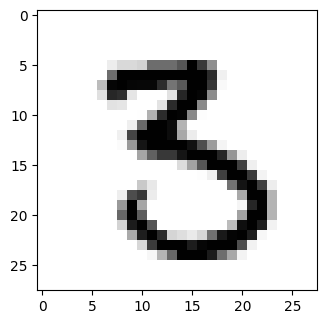

In [106]:
plt.figure(figsize=(8,8))
plt.subplot(221)
for i in x_ab.values:
    x=i.reshape(28,28)
    plt.imshow(x,cmap=mlt.cm.binary)
    

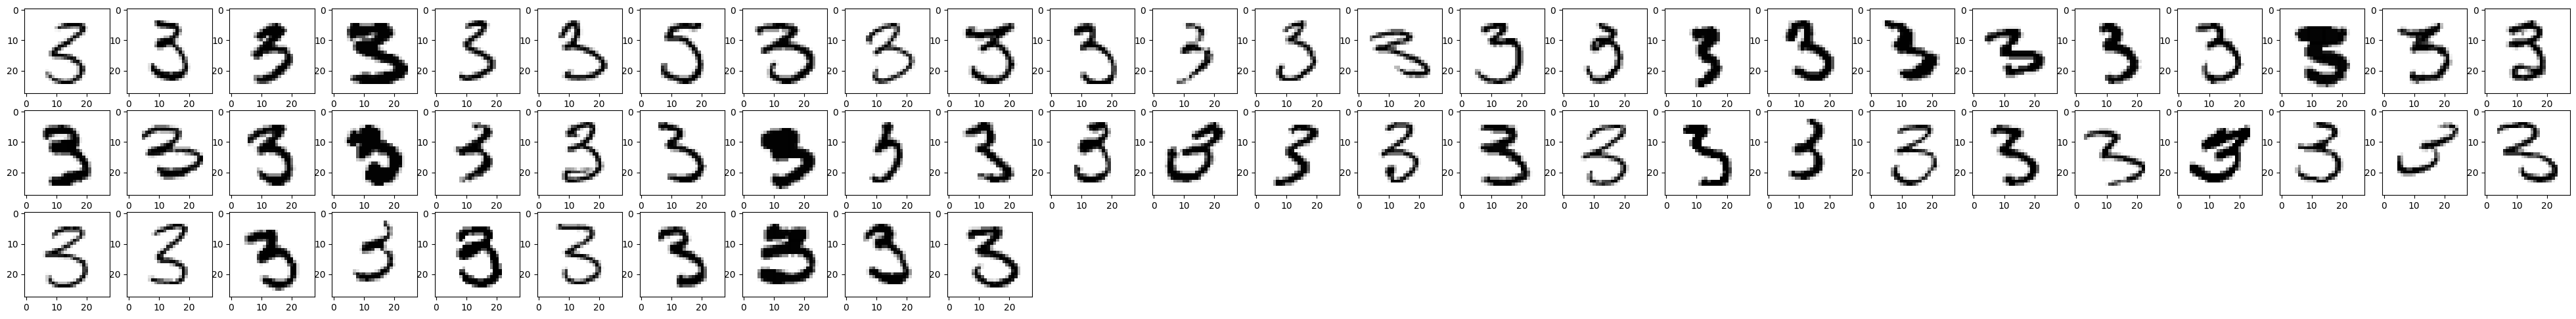

In [120]:
plt.figure(figsize=(50, 50))
for i, img_data in enumerate(x_ab.values):  # Considering the first 4 images
    plt.subplot(25, 25, i + 1)  # Subplot index starts from 1
    img=img_data.reshape(28,28)
    plt.imshow(img, cmap='binary')
   

In [ ]:
plt.figure(figsize=(50, 50))
for i, img_data in enumerate(x_aa.values[:50]):  # Considering the first 4 images
    plt.subplot(25, 25, i + 1)  # Subplot index starts from 1
    img=img_data.reshape(28,28)
    plt.imshow(img, cmap='binary')

In [ ]:
plt.figure(figsize=(50, 50))
for i, img_data in enumerate(x_ba.values):  # Considering the first 4 images
    plt.subplot(25, 25, i + 1)  # Subplot index starts from 1
    img=img_data.reshape(28,28)
    plt.imshow(img, cmap='binary')